In [19]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1.2

### Small angle theorem

This states that for sufficiently small values of x, the following holds true

$$
cos(x) = 1 - \frac{x^2}{2}
$$

The task is to find how small the value of $x$ needs to be for it to hold, given an tolerance of 0.01% relative error.

### Relative error

$$
\text{Relative error} = \frac{\text{Absolute error}}{\text{True value}} * 100\%   \\

\text{Absolute error} = |\text{Approximate} - \text{True value} |

$$

### Assumptions
1. I am assuming that the builtin cos function provides the actual value and plot

In [20]:
small_angle_theorem = lambda x: 1 - ((x**2)/2)
tolerance = 0.0001

### Plot actual cosine vs theorem approximation

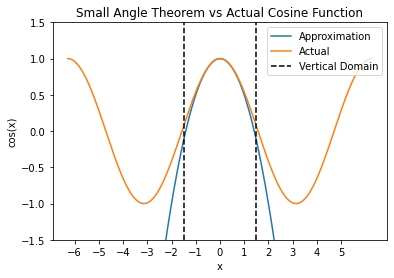

In [50]:
domain = np.linspace(-2*math.pi, 2*math.pi, 1000)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.cos(x) for x in domain]

# plot approximation
plt.plot(domain, range_approx, label='Approximation')
# plot actual
plt.plot(domain, range_actual, label='Actual')

# draw vertical dotted lines at 1.5 and -1.5
vertical_domain = 1.5
plt.axvline(x=vertical_domain, color='black', linestyle='--', label='Vertical Domain')
plt.axvline(x=-vertical_domain, color='black', linestyle='--')

plt.ylim(-1.5, 1.5) # limit y axis between 2 and -2
plt.xticks(np.arange(-6, 6, 1)) # label x axis at intervals of 1
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Small Angle Theorem vs Actual Cosine Function')
plt.legend(loc='upper right')

plt.show()

From the above graph we can see that at some domain between -1.5 and 1.5, the values of the actual cosine function and the approximation (small angle theorem) intersect presumably with a tolerance less than the required 0.01%

Next, I will just be finding that necessary range where the requirement of the tolerance holds true.

In [22]:
def relative_error(approx, actual):
    return abs((approx - actual) / actual)

Approximation is within tolerance of actual for all values in domain between -0.22000000000019604 and 0.22009999999975527


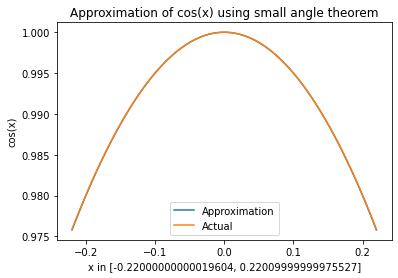

In [46]:
domain = np.arange(-2, 2, tolerance)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.cos(x) for x in domain]

errors = [relative_error(approx, actual) for approx, actual in zip(range_approx, range_actual)]

# domain where approximation is equal to actual within tolerance
tolerance_domain = [True if error < tolerance else False for error in errors]

# find index of first True and last True in tolerance_domain
first_true = tolerance_domain.index(True)
last_true = len(tolerance_domain) - tolerance_domain[::-1].index(True)

# check if all the values between first_true and last_true are True
all_true = all(tolerance_domain[first_true:last_true])
if all_true:
    print(f'Approximation is within tolerance of actual for all values in domain between {domain[first_true]} and {domain[last_true]}')

"""
The above is just a nice way of doing the following
domain_start = 0
for i, error in enumerate(errors):
    if error < tolerance:
        domain_start = i
        break

domain_end = 0
for i, error in enumerate(reversed(errors)):
    if error < tolerance:
        domain_end = len(errors) - i
        break
"""


plt.plot(domain[first_true:last_true], range_approx[first_true:last_true], label='Approximation')
plt.plot(domain[first_true:last_true], range_actual[first_true:last_true], label='Actual')
plt.title('Approximation of cos(x) using small angle theorem')
plt.xlabel(f'x in [{domain[first_true]}, {domain[last_true]}]')
plt.ylabel('cos(x)')
plt.legend()
plt.show()

